## Image preprossing

(450, 600, 3)
122


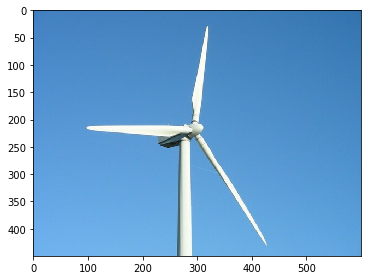

In [1]:
import skimage.io as io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import matplotlib

image_size = (16, 16)

img_orginal = io.imread('images/wind-turbine.jpg')
img = rgb2gray(img_orginal)

io.imshow(img_orginal)
print(img_orginal.shape)
print(img_orginal[2, 3, 1])

(450, 600)
0.45408745098039216
0.9991666666666668


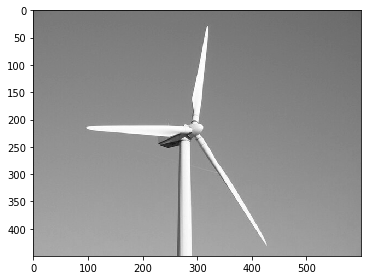

In [2]:
from skimage.util import img_as_float

img = img_as_float(rgb2gray(img_orginal))
io.imshow(img)
print(img.shape)
print(img[2, 5])
print(img.max())

(16, 16)


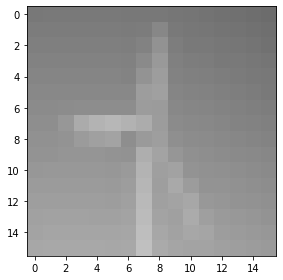

In [3]:
from skimage.transform import resize

img = resize(img, image_size, anti_aliasing=True)
io.imshow(img)
print(img.shape)

## MIMO operation

In [4]:
import cmath
import numpy as np
from numpy import linalg as LA

x = np.matrix([[complex(0.2, 0.4)], 
              [complex(1.1, -0.6)], 
              [complex(0.45, -0.34)], 
              [complex(1.2, 1.4)],
              [complex(0.2, 0.4)], 
              [complex(1.1, -0.6)], 
              [complex(0.45, -0.34)], 
              [complex(1.2, 1.4)],
              [complex(0.2, 0.4)], 
              [complex(1.1, -0.6)], 
              [complex(0.45, -0.34)], 
              [complex(1.2, 1.4)],
              [complex(0.2, 0.4)], 
              [complex(1.1, -0.6)], 
              [complex(0.45, -0.34)], 
              [complex(1.2, 1.4)]])

In [5]:
H = np.matrix(img)
max_val = float(H.max()) + 1e-3
H = H / max_val
H = H.astype(np.cdouble)
print(H.dtype, H[0, 0])

complex128 (0.6275038683198089+0j)


In [6]:
r = H * x
H_ct = H.getH()
Q1 = H * H_ct
Q2 = H_ct * H

In [7]:
D1, U = LA.eig(Q1)
D2, V = LA.eig(Q2)

In [8]:
D = np.sqrt(D1)
print(D)

[1.20374917e+01+0.j 3.19615862e-01+0.j 2.23664290e-01+0.j
 1.41268967e-01+0.j 9.01425156e-02+0.j 6.78364572e-02+0.j
 5.96831492e-02+0.j 1.75571439e-02+0.j 8.61774625e-03+0.j
 4.06115466e-03+0.j 1.23087323e-03+0.j 7.52407218e-04+0.j
 4.81336826e-04+0.j 2.53791541e-04+0.j 1.01757771e-04+0.j
 1.44328947e-04+0.j]


In [9]:
xp = V.getH() * x
rp = U.getH() * r

In [10]:
np.set_printoptions(precision=4)

print(np.array([j for i in np.array(xp) for j in i]))
print("------------------")
print(np.array([j for i in np.array(rp) for j in i]))
print(xp.size, rp.size)

[ 2.9434+0.8825j -0.1762-0.0999j -0.6448-0.2084j -0.0235+0.8288j
  0.2255-1.1568j -0.4963-0.8295j -0.3884-0.7345j  0.4713+0.7989j
  0.1166-0.1513j  0.0687+1.4925j  0.3213+1.5413j -0.7264+0.7544j
 -0.3516-0.0747j -0.8359-0.2426j  0.5564-0.1252j -0.0867-0.6195j]
------------------
[ 3.5431e+01+1.0623e+01j -5.6328e-02-3.1926e-02j -1.4422e-01-4.6609e-02j
  3.3229e-03-1.1709e-01j  2.0331e-02-1.0428e-01j  3.3668e-02+5.6273e-02j
  2.3179e-02+4.3838e-02j  8.2751e-03+1.4026e-02j  1.0047e-03-1.3040e-03j
  2.7899e-04+6.0612e-03j  3.9551e-04+1.8972e-03j -5.4654e-04+5.6764e-04j
 -1.6924e-04-3.5942e-05j -2.1214e-04-6.1576e-05j -8.8246e-06-6.3042e-05j
 -8.0311e-05+1.8066e-05j]
16 16


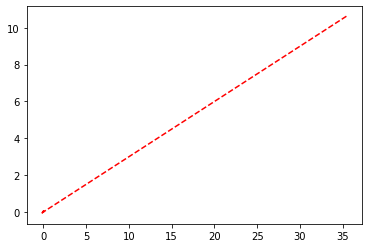

In [11]:
plt.plot([j.real for i in np.array(rp) for j in i], [j.imag for i in np.array(rp) for j in i], 'r--')
plt.show()

/home/tshr/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


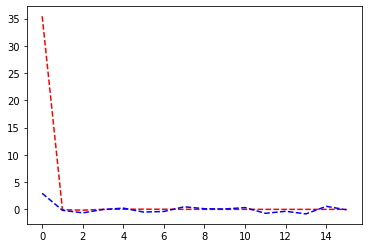

In [12]:
plt.plot([j for i in np.array(rp) for j in i], 'r--', [j for i in np.array(xp) for j in i], 'b--')

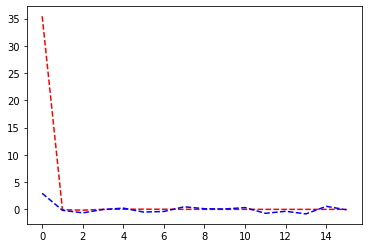

In [13]:
plt.plot([j for i in np.array(rp) for j in i], 'r--', [j for i in np.array(xp) for j in i], 'b--')